## Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Define the domain

In [ ]:
L = 32.0  # Length of the domain
nx = 256  # Number of grid points
x = np.linspace(0, L, nx, endpoint=False)  # Grid points
dx = x[1] - x[0]  # Grid spacing

## Define the initial condition

In [ ]:
u = np.sin(x/16) + np.sin(x/8)

## Define the model parameters

In [ ]:
nu = 0.1  # Viscosity
beta = -1.0  # Dispersion coefficient

## Define the time steps and time span

In [ ]:
dt = 0.01  # Time step
t_max = 100.0  # Maximum simulation time
t = np.arange(0, t_max + dt, dt)  # Time array

## Define the wavenumbers

In [ ]:
k = np.fft.fftfreq(nx, d=dx)  # Wavenumbers
k[0] = 1e-6  # Avoid division by zero

## Define the Fourier transform function

In [ ]:
def fft(f):
    return np.fft.fft(f)

## Define the inverse Fourier transform function

In [ ]:
def ifft(F):
    return np.fft.ifft(F)

## Compute the solution using the Fourier spectral method

In [ ]:
u_hist = np.zeros((len(t), nx))  # Array to store the history of u
u_hist[0, :] = u  # Store the initial condition
for i in range(1, len(t)):
    # Compute the Fourier coefficients
    F = fft(u)
    F *= np.exp(-nu*k**2*dt)  # Apply viscosity
    F += beta*k**2*F*dt  # Apply dispersion
    # Compute the solution in physical space
    u = np.real(ifft(F))
    u_hist[i, :] = u

## Plot results

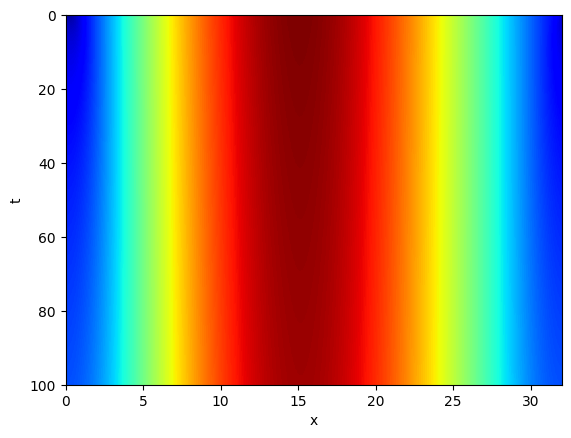

In [ ]:
fig, ax = plt.subplots()
ax.imshow(u_hist, aspect='auto', cmap='jet', extent=[0, L, t_max, 0])
ax.set_xlabel('x')
ax.set_ylabel('t')
plt.show()

## Create a pandas dataframe from the synthetic data

In [ ]:
df = pd.DataFrame(u_hist, columns=['x{}'.format(i) for i in range(nx)])
df['t'] = t

In [ ]:
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x247,x248,x249,x250,x251,x252,x253,x254,x255,t
0,0.000000,0.023437,0.046869,0.070293,0.093704,0.117098,0.140471,0.163817,0.187134,0.210417,...,0.278571,0.264109,0.249754,0.235509,0.221375,0.207357,0.193457,0.179679,0.166023,0.00
1,0.005340,0.022329,0.047314,0.070058,0.093848,0.117000,0.140540,0.163764,0.187175,0.210383,...,0.278533,0.264163,0.249688,0.235604,0.221239,0.207582,0.193045,0.180684,0.161427,0.01
2,0.010152,0.021537,0.047617,0.069900,0.093944,0.116936,0.140586,0.163729,0.187201,0.210361,...,0.278508,0.264198,0.249646,0.235668,0.221150,0.207733,0.192766,0.181400,0.157339,0.02
3,0.014501,0.021013,0.047807,0.069803,0.094002,0.116896,0.140614,0.163707,0.187217,0.210347,...,0.278494,0.264221,0.249620,0.235708,0.221096,0.207827,0.192592,0.181872,0.153695,0.03
4,0.018443,0.020715,0.047910,0.069750,0.094033,0.116875,0.140628,0.163695,0.187225,0.210339,...,0.278487,0.264234,0.249608,0.235730,0.221068,0.207878,0.192498,0.182140,0.150441,0.04
